## Setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%load_ext autoreload
%autoreload 2

## Load Data

In [ ]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
label_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

## Data Plots

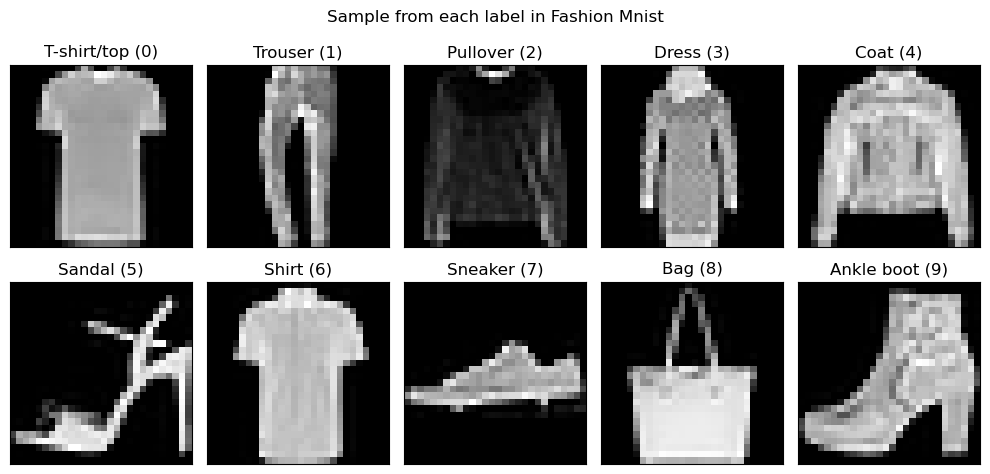

In [ ]:
samples = (
    pd.DataFrame(y_train, columns=["label"])
    .reset_index()
    .groupby("label")[["label", "index"]]
    .apply(lambda x: x.sample(1))
    .values.tolist()
)
# For logging with wandb
# images = [
#     wandb.Image(train_X[index], caption=f"{label_names[label]} ({label})")
#     for label, index in samples
# ]
# wandb.log({'examples':images})

# plottting samples from each labels
plt.figure(figsize=(10, 5))
for i, (label, index) in enumerate(samples, 1):
    plt.subplot(2, 5, i)
    plt.imshow(X_train[index], cmap="gray")
    plt.xticks([], [])
    plt.yticks([], [])
    plt.title(f"{label_names[label]} ({label})")
plt.suptitle("Sample from each label in Fashion Mnist")
plt.tight_layout()
plt.show()

## Feed Forward Neural Network Implementaion

In [9]:
from necto_nn.nn import FeedForwardNetwork
from necto_nn.activations import ReLU, SoftMax
from necto_nn.intializers import XavierInit
from necto_nn.optimizers import SGD
from necto_nn.utils import one_hot, flatten

# Flatten images and one hot labels
X_train, X_test = flatten(X_train), flatten(X_test)
y_train, y_test = one_hot(y_train), one_hot(y_test)

hidden_size = 32
n_hidden_layers = 5

model = FeedForwardNetwork(
    input_size=X_train.shape[-1],
    layers=[(hidden_size, ReLU()) for i in range(n_hidden_layers)]
    + [(y_train.shape[-1], SoftMax())],
    initializer=XavierInit(),
)


model.init()
out = model.forward(X_train[:5])
out

array([[1.56445447e-29, 2.65205071e-36, 6.82756376e-33, 1.49554978e-33,
        4.33228487e-23, 2.53315304e-28, 6.47180179e-19, 4.76127491e-42,
        9.59668319e-41, 9.99999999e-01],
       [1.46996032e-15, 7.53448463e-20, 9.79532666e-09, 1.59493380e-03,
        4.15297617e-09, 9.98305430e-01, 6.52348860e-06, 2.45458949e-17,
        6.27154572e-24, 9.30975765e-05],
       [7.73279033e-12, 1.13099167e-23, 1.79822507e-12, 1.92367806e-05,
        1.13483801e-10, 2.35822165e-09, 6.22956647e-10, 1.98190760e-22,
        1.95469650e-29, 9.99980759e-01],
       [1.33663898e-13, 7.62774680e-11, 5.05807801e-09, 1.37013354e-06,
        3.76117799e-11, 3.45503283e-02, 3.38285922e-05, 3.84323465e-15,
        5.10424437e-17, 9.65414467e-01],
       [4.76846237e-30, 6.08208905e-50, 4.12618936e-28, 7.00622735e-26,
        1.74884048e-25, 1.60030106e-27, 1.07257756e-26, 1.53082738e-44,
        1.83205016e-55, 9.99999999e-01]])

## BackProp with different optimizers Using Trainer

In [46]:
from necto_nn.optimizers import SGD, Momentum,NAG, RMSProp, Adam, NAdam
from necto_nn.losses import  CrossEntropyLoss
from necto_nn.trainer import Trainer

for Opt in [SGD, Momentum, NAG, RMSProp, Adam, NAdam]:

    trainer = Trainer(
        model=model,
        n_epochs=1,
        batch_size=32,
        optimizer=Opt(),
        loss=CrossEntropyLoss(),
        metrics=['accuracy','val_accuracy'],
        eval_steps= 20
    )
    trainer.train(X_train=X_train[:2*3200],y_train = y_train[:2*3200], X_val=X_test, y_val=y_test)

steps: 100%|██████████| 200/200 [00:08<00:00, 24.20it/s, epoch=1, loss=1.04, accuracy=0.625, val_loss=101, val_accuracy=0.661]    
